In [1]:
from checkpoint import Checkpoint
from train import TrainingManager
checkpoint = Checkpoint("../trained_models/train1-for-testing", 1)

C:\Users\Matej\Documents\seminar2\text-to-image\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from tqdm import tqdm

errors = []
for epoch in tqdm(range(5, 755, 5)):
    tm = TrainingManager(checkpoint, last_epoch=epoch)
    d_error, g_error = tm.test()
    errors.append((epoch, d_error, g_error))

In [3]:
print(errors)

[(5, 1.8362947702407837, 20.919247817993163), (10, 1.7270017385482788, 22.557298851013183), (15, 1.843358302116394, 21.250516510009767), (20, 1.745180070400238, 22.5688533782959), (25, 1.724416399002075, 22.396286010742188), (30, 1.5634336709976195, 23.549967765808105), (35, 1.7826585650444031, 22.76708068847656), (40, 1.7184346795082093, 24.132154083251955), (45, 1.6259357452392578, 23.671018409729005), (50, 1.8806081771850587, 25.320125389099122), (55, 1.624763822555542, 24.07948398590088), (60, 1.683820402622223, 25.023972511291504), (65, 1.63045734167099, 24.451444244384767), (70, 1.63805193901062, 25.16975803375244), (75, 1.6510845184326173, 25.601649665832518), (80, 1.7619158744812011, 26.31048641204834), (85, 1.6702163577079774, 24.82208957672119), (90, 1.646916115283966, 25.376918029785156), (95, 1.819058072566986, 26.670918655395507), (100, 1.7052229166030883, 24.937329864501955), (105, 1.9917175054550171, 26.317046928405762), (110, 1.6301803231239318, 25.78875141143799), (115

In [4]:
import json
with open("../trained_models/train1-for-testing/test_losses.json", "w") as f:
    json.dump(errors, f)

In [1]:
import json
with open("../trained_models/train1-for-testing/test_losses.json", "r") as f:
    errors = json.load(f)

In [2]:
import matplotlib.pyplot as plt

def plot_training_loss(loss_list, title="Training Loss per Iteration"):
    plt.figure(figsize=(10, 6))
    plt.plot(loss_list, label='Training Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_test_loss(epochs, loss_list, title="loss"):
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss_list, label="Loss")

    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
d_test_loss = [e[1] for e in errors]
g_test_loss = [e[2] for e in errors]
epochs = [e[0] for e in errors]


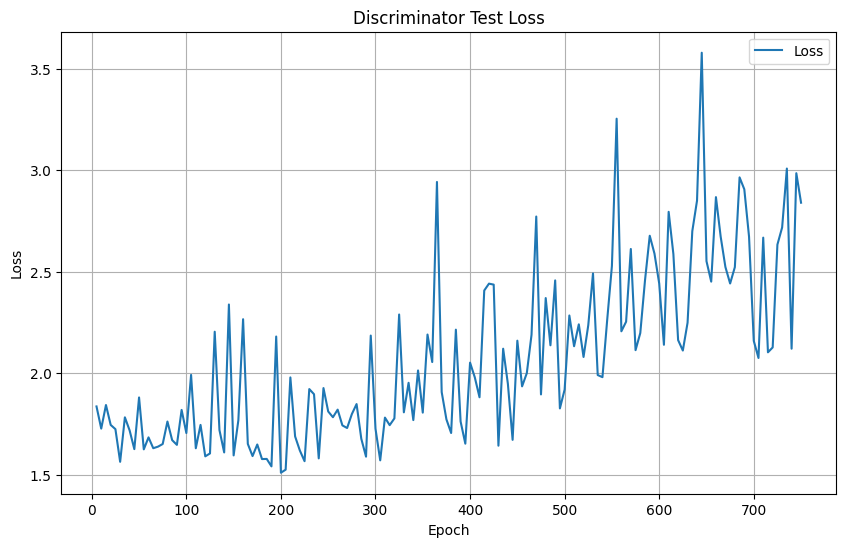

In [6]:
plot_test_loss(epochs, d_test_loss, title="Discriminator Test Loss")

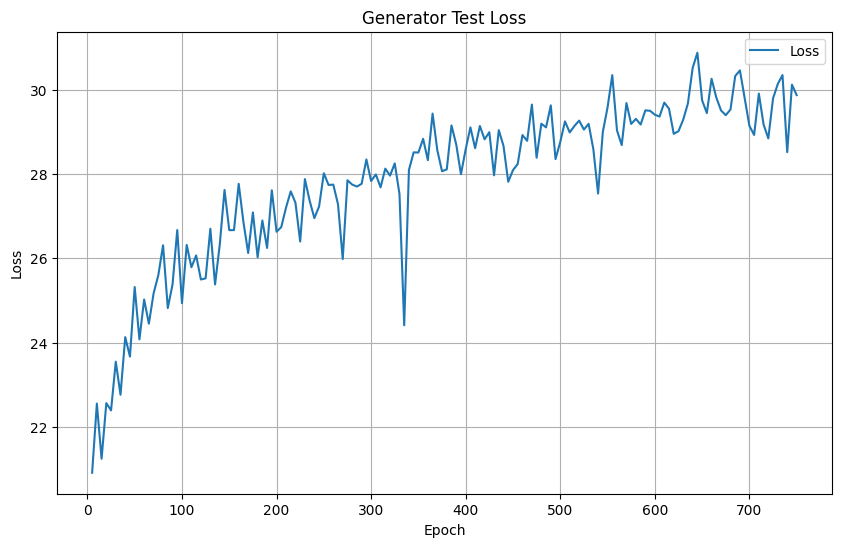

In [7]:
plot_test_loss(epochs, g_test_loss, title="Generator Test Loss")

In [12]:
print([e for e in errors if int(e[2]) == 24])

[(40, 1.7184346795082093, 24.132154083251955), (55, 1.624763822555542, 24.07948398590088), (65, 1.63045734167099, 24.451444244384767), (85, 1.6702163577079774, 24.82208957672119), (100, 1.7052229166030883, 24.937329864501955), (335, 1.952840220928192, 24.412326622009278)]
